In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

Go to scalars tab in tensorboard --> tick the download links option

Download each run as a csv --> bottom right button on the AverageReturn graph

Create a directory with these csv files

questions

    q3
        <files>
    q4
        <files>

In [19]:

files_dir = "../../data"
def load_files(files_dir):
    filenames = os.listdir(files_dir)
    #lognames = [os.listdir(f"{files_dir}/{i}")[0] for i in filenames]
    pd_tables = [pd.read_csv(f"{files_dir}/{i}") for i in filenames]
    return filenames, pd_tables

In [33]:
files, pd_tables = load_files(f"{files_dir}/prune_comp")
[f"{files[i]} {i}" for i in range(len(files))]

['run-hw2-quant_data_q2_pg_cheetah_baseline_HalfCheetah-v4_25-10-2023_21-58-21-tag-Eval_AverageReturn.csv 0',
 'run-hw2_data_q2_pg_cheetah_end_prune_HalfCheetah-v4_25-10-2023_20-22-31-tag-Train_EnvstepsSoFar.csv 1',
 'run-hw2_data_q2_pg_cheetah_beg_prune_HalfCheetah-v4_25-10-2023_20-23-18-tag-Eval_AverageReturn.csv 2',
 'run-hw2_data_q2_pg_cheetah_end_prune_HalfCheetah-v4_25-10-2023_20-22-31-tag-Eval_AverageReturn.csv 3']

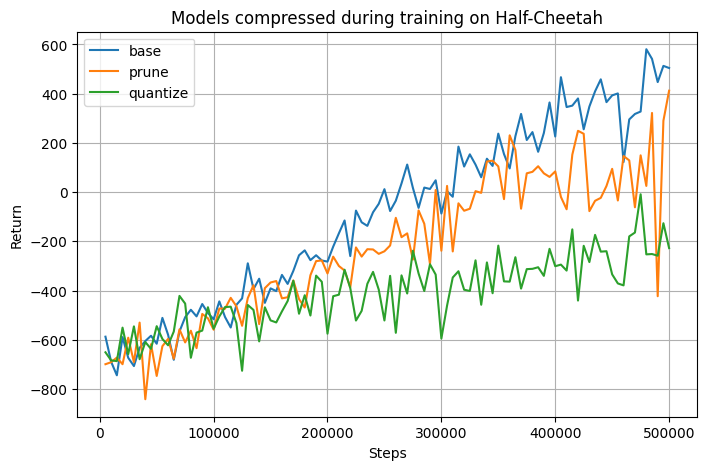

In [34]:
step_table = pd_tables[1]
eval_table = pd_tables[3]
prune_table = pd_tables[2]
quant_table = pd_tables[0]
plt.figure(figsize=(8, 5))
plt.plot(step_table["Value"], eval_table["Value"], label="base")
plt.plot(step_table["Value"], prune_table["Value"], label="prune")
plt.plot(step_table["Value"], quant_table["Value"], label="quantize")
plt.title("Models compressed during training on Half-Cheetah")
plt.xlabel("Steps")
plt.ylabel("Return")
plt.legend()
plt.grid()

In [30]:
files, pd_tables = load_files(f"{files_dir}/prune_long")
[f"{files[i]} {i}" for i in range(len(files))]

['run-hw2_data_q2_pg_cheetah_eval_long_HalfCheetah-v4_25-10-2023_21-35-21-tag-Comp_AverageReturn.csv 0',
 'run-hw2_data_q2_pg_cheetah_eval_long_HalfCheetah-v4_25-10-2023_21-35-21-tag-Eval_AverageReturn.csv 1',
 'run-hw2_data_q2_pg_cheetah_eval_long_HalfCheetah-v4_25-10-2023_21-35-21-tag-Comp_StdReturn.csv 2',
 'run-hw2_data_q2_pg_cheetah_eval_long_HalfCheetah-v4_25-10-2023_21-35-21-tag-Eval_StdReturn.csv 3']

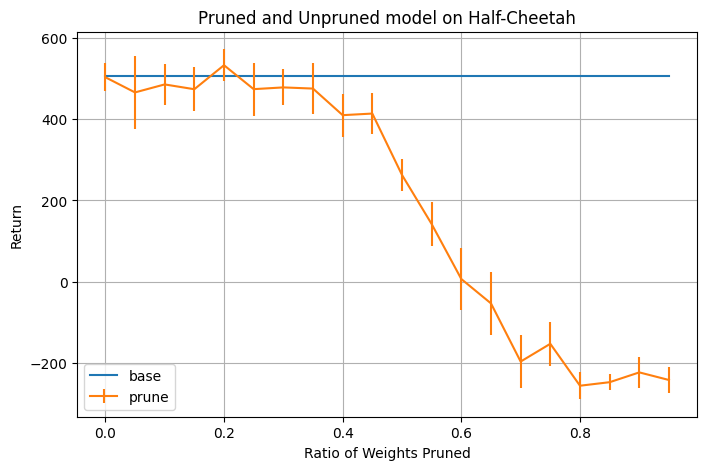

In [28]:
eval_table = pd_tables[1]
eval_std = pd_tables[3]
prune_table = pd_tables[0]
prune_std = pd_tables[2]
plt.figure(figsize=(8, 5))
plt.plot([i*0.05 for i in range(0,20)], [sum(eval_table["Value"])/20 for _ in range(20)], label="base")
plt.errorbar([i*0.05 for i in range(0,20)], prune_table["Value"], yerr=prune_std["Value"], label="prune")
plt.title("Pruned and Unpruned model on Half-Cheetah")
plt.xlabel("Ratio of Weights Pruned")
plt.ylabel("Return")
plt.legend()
plt.grid()

# Q3

In [2]:

files_dir = "../../data"
def load_files(files_dir):
    filenames = os.listdir(files_dir)
    #lognames = [os.listdir(f"{files_dir}/{i}")[0] for i in filenames]
    pd_tables = [pd.read_csv(f"{files_dir}/{i}") for i in filenames]
    return filenames, pd_tables

In [43]:
question=3
files, pd_tables = load_files(f"{files_dir}/q{question}")
print(pd_tables[0].columns)
[f"{files[i]} {i}" for i in range(len(files)) if "lb" in files[i]]
# [f"{files[i]} {i}" for i in range(len(files)) if "Return" in files[i]]

Index(['Wall time', 'Step', 'Value'], dtype='object')


['run-data_q2_pg_cartpole_lb_CartPole-v0_27-09-2023_20-02-47-tag-Eval_AverageReturn.csv 0',
 'run-data_q2_pg_cartpole_lb_na_CartPole-v0_27-09-2023_20-03-27-tag-Train_EnvstepsSoFar.csv 2',
 'run-data_q2_pg_cartpole_lb_rtg_CartPole-v0_27-09-2023_20-03-11-tag-Eval_AverageReturn.csv 4',
 'run-data_q2_pg_cartpole_lb_rtg_na_CartPole-v0_27-09-2023_20-03-41-tag-Eval_AverageReturn.csv 6',
 'run-data_q2_pg_cartpole_lb_CartPole-v0_27-09-2023_20-02-47-tag-Train_EnvstepsSoFar.csv 7',
 'run-data_q2_pg_cartpole_lb_rtg_na_CartPole-v0_27-09-2023_20-03-41-tag-Train_EnvstepsSoFar.csv 8',
 'run-data_q2_pg_cartpole_lb_na_CartPole-v0_27-09-2023_20-03-27-tag-Eval_AverageReturn.csv 9',
 'run-data_q2_pg_cartpole_lb_rtg_CartPole-v0_27-09-2023_20-03-11-tag-Train_EnvstepsSoFar.csv 15']

In [44]:
first_part_filter_value = [12, 3, 10, 14]
first_part_filter_step = [1, 5, 11, 13]
first_part_labels = ["standard", "na", "rtg", "rtg na"]
second_part_filter_value = [9, 0, 6, 4]
second_part_filter_step = [2, 7, 8, 15]
second_part_labels = ["na", "standard", "rtg na", "rtg"]

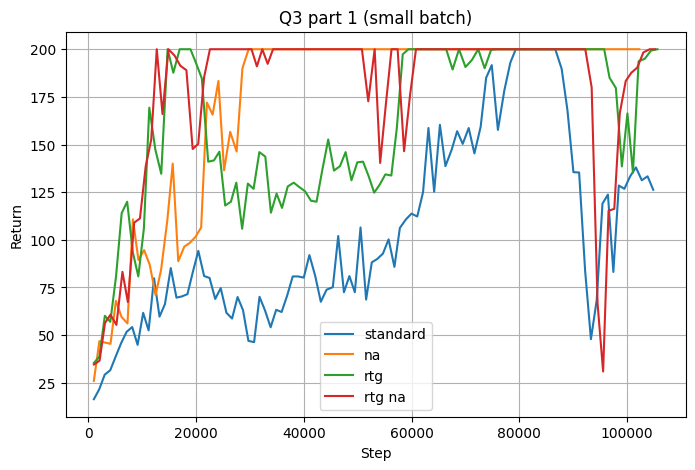

In [45]:
data_tables= [pd_tables[i] for i in first_part_filter_value]
step_tables = [pd_tables[i] for i in first_part_filter_step]
plt.figure(figsize=(8, 5))
for i, table in enumerate(data_tables):
    plt.plot(step_tables[i]["Value"], table["Value"], label=first_part_labels[i])

plt.title("Q3 part 1 (small batch)")
plt.xlabel("Step")
plt.ylabel("Return")
plt.legend()
plt.grid()

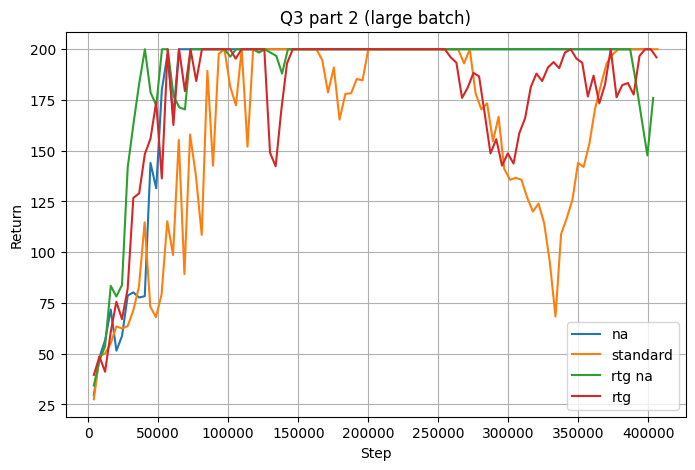

In [48]:
data_tables= [pd_tables[i] for i in second_part_filter_value]
step_tables = [pd_tables[i] for i in second_part_filter_step]
plt.figure(figsize=(8, 5))
for i, table in enumerate(data_tables):
    plt.plot(step_tables[i]["Value"], table["Value"], label=second_part_labels[i])

plt.title("Q3 part 2 (large batch)")
plt.xlabel("Step")
plt.ylabel("Return")
plt.legend()
plt.grid()

# Q4

In [16]:
question=4
files, pd_tables = load_files(f"{files_dir}/q{question}")
print(pd_tables[0].columns)
files

Index(['Wall time', 'Step', 'Value'], dtype='object')


['run-data_q2_pg_cheetah_baseline_blr0.005_HalfCheetah-v4_27-09-2023_21-44-53-tag-Baseline_Loss.csv',
 'run-data_q2_pg_cheetah_baseline_HalfCheetah-v4_27-09-2023_21-06-16-tag-Eval_AverageReturn.csv',
 'run-data_q2_pg_cheetah_HalfCheetah-v4_27-09-2023_20-26-31-tag-Eval_AverageReturn.csv',
 'run-data_q2_pg_cheetah_baseline_HalfCheetah-v4_27-09-2023_21-06-16-tag-Baseline_Loss.csv',
 'run-data_q2_pg_cheetah_baseline_blr0.005_HalfCheetah-v4_27-09-2023_21-44-53-tag-Eval_AverageReturn.csv']

In [17]:
first_part_filter = [1, 2, 4]
second_part_filter = [0, 3]

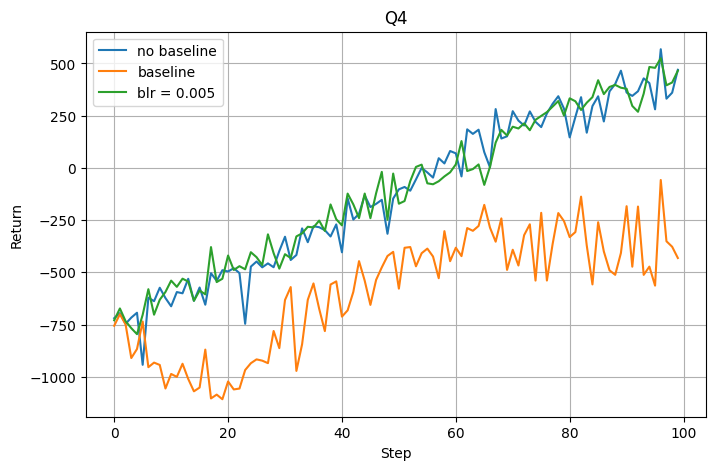

In [18]:
filt_tables= [pd_tables[i] for i in first_part_filter]
titles = ["no baseline", "baseline", "blr = 0.005"]
plt.figure(figsize=(8, 5))
for i in range(len(filt_tables)):
    plt.plot(filt_tables[i]["Step"], filt_tables[i]["Value"], label=titles[i])

plt.title("Q4")
plt.xlabel("Step")
plt.ylabel("Return")
plt.grid()
plt.legend()

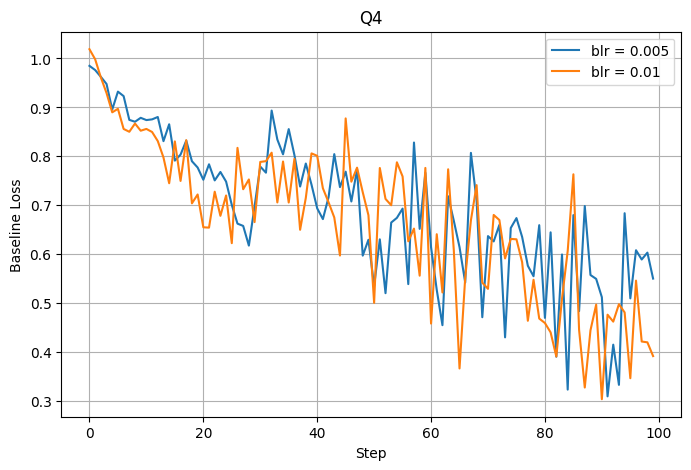

In [19]:
filt_tables= [pd_tables[i] for i in second_part_filter]
titles = ["blr = 0.005", "blr = 0.01"]
plt.figure(figsize=(8, 5))
for i in range(len(filt_tables)):
    plt.plot(filt_tables[i]["Step"], filt_tables[i]["Value"], label=titles[i])

plt.title("Q4")
plt.xlabel("Step")
plt.ylabel("Baseline Loss")
plt.grid()
plt.legend()

# Q5

In [20]:
question=5
files, pd_tables = load_files(f"{files_dir}/q{question}")
print(pd_tables[0].columns)
files

Index(['Wall time', 'Step', 'Value'], dtype='object')


['run-data_q2_pg_lunar_lander_lambda0.95_LunarLander-v2_27-09-2023_20-54-52-tag-Eval_AverageReturn.csv',
 'run-data_q2_pg_lunar_lander_lambda0.98_LunarLander-v2_27-09-2023_20-56-00-tag-Eval_AverageReturn.csv',
 'run-data_q2_pg_lunar_lander_lambda0_LunarLander-v2_27-09-2023_20-46-49-tag-Eval_AverageReturn.csv',
 'run-data_q2_pg_lunar_lander_lambda0.99_LunarLander-v2_27-09-2023_20-56-08-tag-Eval_AverageReturn.csv',
 'run-data_q2_pg_lunar_lander_lambda1_LunarLander-v2_27-09-2023_20-56-17-tag-Eval_AverageReturn.csv']

In [21]:
first_part_filter = [2, 0, 1, 3, 4]

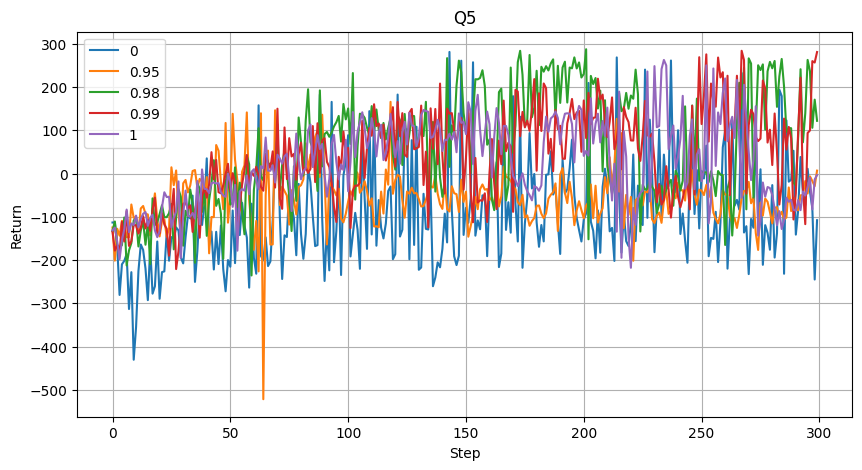

In [22]:
filt_tables= [pd_tables[i] for i in first_part_filter]
titles = [0, 0.95, 0.98, 0.99, 1]
plt.figure(figsize=(10, 5))
for i in range(len(filt_tables)):
    plt.plot(filt_tables[i]["Step"], filt_tables[i]["Value"], label=f"{titles[i]}")

plt.title("Q5")
plt.xlabel("Step")
plt.ylabel("Return")
plt.grid()
plt.legend()

# Q6

In [61]:
question=6
files, pd_tables = load_files(f"{files_dir}/q{question}")
print(pd_tables[0].columns)
default_data_tables = [pd_tables[i] for i in range(len(files)) if "Return" in files[i] and "default" in files[i]]
new_data_tables = [pd_tables[i] for i in range(len(files)) if "Return" in files[i] and "hyper" in files[i]]
new_data_steps = [pd_tables[i] for i in range(len(files)) if "steps" in files[i] and "hyper" in files[i]]
default_data_steps = [pd_tables[i] for i in range(len(files)) if "steps" in files[i] and "default" in files[i]]
default_data_steps

Index(['Wall time', 'Step', 'Value'], dtype='object')


[       Wall time  Step     Value
 0   1.695874e+09     0    5004.0
 1   1.695874e+09     1   10007.0
 2   1.695874e+09     2   15012.0
 3   1.695874e+09     3   20040.0
 4   1.695874e+09     4   25051.0
 ..           ...   ...       ...
 95  1.695875e+09    95  494097.0
 96  1.695875e+09    96  499097.0
 97  1.695875e+09    97  504097.0
 98  1.695875e+09    98  509097.0
 99  1.695875e+09    99  514097.0
 
 [100 rows x 3 columns]]

In [62]:
filt_tables = np.array([i["Value"] for i in new_data_tables])
filt2_tables = np.array([i["Value"] for i in default_data_tables])
filt1_avg = np.mean(filt_tables, axis=0)
filt2_avg = np.mean(filt2_tables, axis=0)

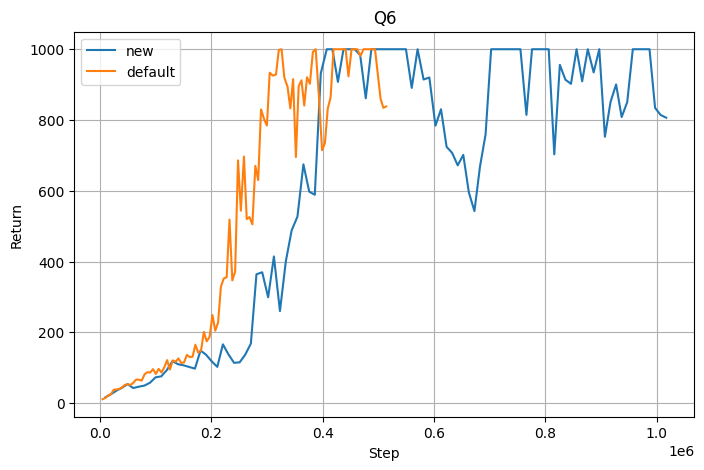

In [64]:
titles = ["new", "default"]
plt.figure(figsize=(8, 5))
plt.plot(new_data_steps[0]["Value"], filt1_avg, label=titles[0])
plt.plot(default_data_steps[0]["Value"], filt2_avg, label=titles[1])

plt.title("Q6")
plt.xlabel("Step")
plt.ylabel("Return")
plt.grid()
plt.legend()